# Help International NGO Clustering Assignment: Ganesh Nagappa Shetty

## Overview

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO needs to focus on the most.

## 1. Reading and Understanding the Data

Let us first import necessary libraries, dataset and try to understand the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all important libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

#Importing Standard Scaler
import sklearn
from sklearn.preprocessing import StandardScaler

#Importing K-Means libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import Hierarchial Clustering Libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Load the dataset and check initial entries of the dataset
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Shape of the dataframe (Rows & Columns)
df.shape

(167, 10)

In [5]:
# Information Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Checking for Missing Values

In [6]:
# Checing for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values in the dataset and all the datatypes are correct. Lets check for outliers in the data.

#### Checking for duplicates and dropping (if any)

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any
df.drop_duplicates(subset=None, inplace=True)
df.shape

(167, 10)

There are no duplicates in the data

The variables exports, health and imports are percentage of gdpp. We need to extract the absolute value of these variables

In [8]:
# Convert exports, health and imports to absolute values
df['exports']=df['exports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100

# First Few Lines of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 2. Outlier Analysis

In [9]:
# Statistical Summary of the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# Variables to check for Outliers
cols=df.columns[df.dtypes!=object]
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

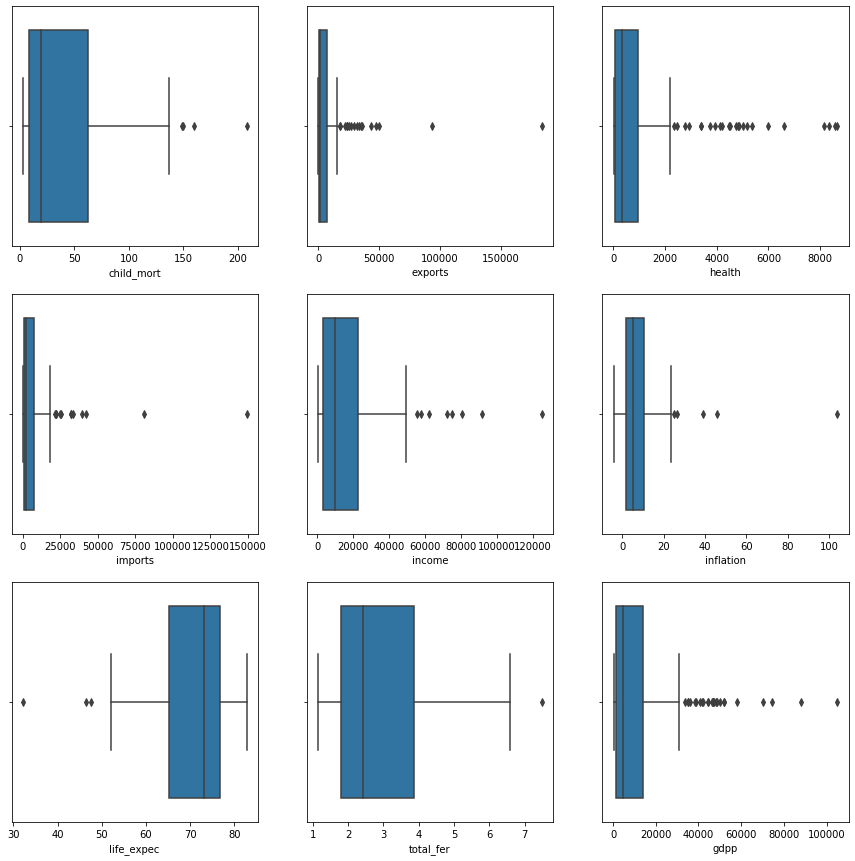

In [11]:
# Plotting the boxplot to check Outliers
plt.figure(figsize=(15,15))
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

**Observation:** We can Observe that outliers are present in every variable of the data. 

Now we have various options of dealing with outliers.
- Dropping of outliers doesn't make sense since we have very small dataset
- Omitting of outliers based on IQR values doesn't make sense as it removes entries that would have really deserved the Financial Aid
- If we let outliers stay in the data it may impact clustering of the model as the presence of Outlier can change the CENTROID of the cluster
- Capping the outliers might change the ranking of few countries with respect to requirement of Financial Aid. Therefore we need to pick the right range of outliers(Upper / Lower range) to target for each variable

We have to do the following
    - child_mort: This variable has outliers in the upper range which can not be altered as the countries with higher child mortality rate may in dire state of financial need. We will not alter this variable
    - exports, health, imports, income & gdpp: These variables have outliers in the upper range which can be capped at 99% of the data
    - inflation: This variable has outliers in the upper range which can not be altered as the countries with higher inflation may be contenders for financial need. We will not alter this variable
    - life_expec: This variable has outliers in the lower range which can be capped at 1% of the data
    - total_fer: This variable has outliers in the upper range which can not be altered as the countries with higher total  fertility rate may be contenders for financial need. We will not alter this variable

In [12]:
# Capping exports, health, import, income & gdpp to 99%

# Variables to be capped to 99%
cols1=['exports', 'health', 'imports', 'income', 'gdpp']

# Capping to 99%
for col in cols1:
    q=df[col].quantile(0.99)
    df[col][df[col]>=q]=q

In [13]:
# Capping life_expec to 1%

q=df['life_expec'].quantile(0.01)
df['life_expec'][df['life_expec']<=q]=q

## 3. Data Visualizations

In [14]:
# First few datapoints of the dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


#### Child Mortality Rate

In [15]:
# Plotting Child Mortality Rate vs Countries
df.iplot(kind='bar',x='country',y='child_mort',title='Child Mortality Rate')

In [16]:
# Top-5 Countries having highest Child Mortality Rate
df.sort_values('child_mort',ascending=False).country[:5]

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

In [17]:
# Top-5 Countries having Lowest Child Mortality Rate
df.sort_values('child_mort').country[:5]

68        Iceland
91     Luxembourg
133     Singapore
53        Finland
144        Sweden
Name: country, dtype: object

**Insights:** 
- `Haiti`, `Sierra Leone`, `Chad`, `Central African Republic` and `Mali` are known for their High Child Mortality Rates. 
- `Haiti` being the highest it had significantly high Child mortality rate (240) in the 1970's. It gradually fell over the years. 
- `Iceland`, `Luxembourg`, `Singapore`, `Finland` and `Sweden` on the other hand have low child mortality rates. 
- We can observe that 3 of the top 5 countries are Scandinavian countries. All these countries together with `Luxembourg` and `Singapore` generally known for their high standard of living.

#### Export

In [18]:
# Plotting Export vs Countries
df.iplot(kind='bar',x='country',y='exports',title='Exports')

In [19]:
# Top-5 Countries having highest Export
df.sort_values('exports',ascending=False).country[:5]

133      Singapore
91      Luxembourg
73         Ireland
145    Switzerland
123          Qatar
Name: country, dtype: object

In [20]:
# Top-5 Countries having Lowest Export
df.sort_values('exports').country[:5]

107                     Myanmar
26                      Burundi
50                      Eritrea
31     Central African Republic
0                   Afghanistan
Name: country, dtype: object

**Insights:**
- `Singapore`, `Luxembourg`, `Ireland`, `Switzerland` and `Qatar` are Countries with highest exports. 
- `Myanmar`, `Burundi`, `Eritrea`, `Central African Republic` and `Afghanistan` have low Exports.

#### Import

In [21]:
# Plotting Import vs Countries
df.iplot(kind='bar',x='country',y='imports',title='Imports')

In [22]:
# Top-5 Countries having highest imports
df.sort_values('imports',ascending=False).country[:5]

133      Singapore
91      Luxembourg
73         Ireland
145    Switzerland
15         Belgium
Name: country, dtype: object

In [23]:
# Top-5 Countries having Lowest imports
df.sort_values('imports').country[:5]

107                     Myanmar
26                      Burundi
50                      Eritrea
31     Central African Republic
132                Sierra Leone
Name: country, dtype: object

**Insights:** 
- `Singapore`, `Luxembourg`, `Ireland`, `Switzerland` and `Belgium` are Countries with highest imports. 
- `Myanmar`, `Burundi`, `Eritrea`, `Central African Republic` and `Sierra Leone` have low imports. 
- We can observe that `Singapore`, `Luxembourg`, `Ireland` & `Switzerland` also figure in Top-5 export rich countries. Which means these are the countries with highest Trade to GDP ratio. 
- `Myanmar`, `Burundi`, `Eritrea` and `Central African Republic` are low export and low import countries which means they are self sustaining economies which are not dependent on trade.

#### Healthcare Expenditure

In [24]:
# Plotting Healthcare expenditure vs Countries
df.iplot(kind='bar',x='country',y='health',title='Healthcare Expenditure')

In [25]:
# Top-5 Countries having highest healthcare expenditure
df.sort_values('health',ascending=False).country[:5]

159    United States
145      Switzerland
114           Norway
91        Luxembourg
44           Denmark
Name: country, dtype: object

In [26]:
# Top-5 Countries having Lowest healthcare expenditure
df.sort_values('health').country[:5]

50                      Eritrea
93                   Madagascar
31     Central African Republic
112                       Niger
107                     Myanmar
Name: country, dtype: object

**Insights:** 
- `United States`, `Switzerland`, `Norway`, `Luxembourg` and `Denmark` are Countries with highest Healthcare expenditure. 
- `Eritrea`, `Madagascar`, `Central African Republic`, `Niger` and `Myanmar` have lowest Healthcare expenditures. 

#### Net Income Per Person

In [27]:
# Plotting Net Income Per Person vs Countries
df.iplot(kind='bar',x='country',y='income',title='Net Income Per Person')

In [28]:
# Top-5 Countries having highest Net Income Per Person
df.sort_values('income',ascending=False).country[:5]

91     Luxembourg
123         Qatar
23         Brunei
82         Kuwait
133     Singapore
Name: country, dtype: object

In [29]:
# Top-5 Countries having Lowest Net Income Per Person
df.sort_values('income').country[:5]

37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
112                       Niger
31     Central African Republic
Name: country, dtype: object

**Insights:** 
- `Luxembourg`, `Qatar`, `Brunei`, `Kuwait` and `Singapore` are Countries with highest Net Income Per Person. 
- `Congo, Dem. Rep.`, `Liberia`, `Burundi`, `Niger` and `Central African Republic` have lowest Net Income Per Person. 
- `Qatar`, `Brunei` and `Kuwait` are oil rich countries
- `Luxembourg` and `Singapore` are highly industrialized economies

<br>Source: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita

#### Inflation Rate

In [30]:
# Plotting Inflation Rate vs Countries
df.iplot(kind='bar',x='country',y='inflation',title='Inflation Rate')

In [31]:
# Top-5 Countries having highest Inflation Rate
df.sort_values('inflation',ascending=False).country[:5]

113              Nigeria
163            Venezuela
103             Mongolia
149          Timor-Leste
49     Equatorial Guinea
Name: country, dtype: object

In [32]:
# Top-5 Countries having Lowest Inflation Rate
df.sort_values('inflation').country[:5]

131        Seychelles
73            Ireland
77              Japan
43     Czech Republic
135          Slovenia
Name: country, dtype: object

**Insights:** 
- `Nigeria`, `Venezuela`, `Mongolia`, `Timor-Leste` and `Equatorial Guinea` are Countries with highest Inflation Rate. 
- `Seychelles`, `Ireland`, `Japan`, `Czech Republic` and `Slovenia` have lowest Inflation Rate. 

#### Life Expectancy

In [33]:
# Plotting Life Expectancy vs Countries
df.iplot(kind='bar',x='country',y='life_expec',title='Life Expectancy')

In [34]:
# Top-5 Countries having highest Life Expectancy
df.sort_values('life_expec',ascending=False).country[:5]

77           Japan
133      Singapore
145    Switzerland
68         Iceland
7        Australia
Name: country, dtype: object

In [35]:
# Top-5 Countries having Lowest Life Expectancy
df.sort_values('life_expec').country[:5]

87                      Lesotho
66                        Haiti
31     Central African Republic
166                      Zambia
94                       Malawi
Name: country, dtype: object

**Insights:** 
- `Japan`, `Singapore`, `Switzerland`, `Iceland` and `Australia` are Countries with highest Life Expectancy. 
- `Lesotho`, `Haiti`, `Central African Republic`, `Zambia` and `Malawi` have lowest Life Expectancy. 
- `Haiti` and `Central African Republic` also feature as countries with highest child mortality rate.

<br>Source: https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy

#### Total Fertility

In [36]:
# Plotting Total Fertility vs Countries
df.iplot(kind='bar',x='country',y='total_fer',title='Total Fertility')

In [37]:
# Top-5 Countries having highest Total Fertility
df.sort_values('total_fer',ascending=False).country[:5]

112               Niger
32                 Chad
97                 Mali
37     Congo, Dem. Rep.
26              Burundi
Name: country, dtype: object

In [38]:
# Top-5 Countries having Lowest Total Fertility
df.sort_values('total_fer').country[:5]

133                 Singapore
138               South Korea
67                    Hungary
102                   Moldova
20     Bosnia and Herzegovina
Name: country, dtype: object

**Insights:** 
- `Niger`, `Chad`, `Mali`, `Congo, Dem. Rep.` and `Burundi` are Countries with highest Total Fertility. 
- `Singapore`, `South Korea`, `Hungary`, `Moldova` and `Bosnia and Herzegovina` have lowest Total Fertility. 
- All the Top-5 countries with highest total fertility are African countries
- Among the Top-5 countries with Low fertilities, `Hungary`, `Moldova` and `Bosnia and Herzegovina` are geographically closer

<br>Source: https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate

#### GDP per capita

In [39]:
# Plotting GDP per capita vs Countries
df.iplot(kind='bar',x='country',y='gdpp',title='GDP per capita')

In [40]:
# Top-5 Countries having highest GDP per capita
df.sort_values('gdpp',ascending=False).country[:5]

114         Norway
91      Luxembourg
145    Switzerland
123          Qatar
44         Denmark
Name: country, dtype: object

In [41]:
# Top-5 Countries having GDP per capita
df.sort_values('gdpp').country[:5]

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

**Insights:** 
- `Norway`, `Luxembourg`, `Switzerland`, `Qatar` and `Denmark` are Countries with highest GDP per capita. 
- `Burundi`, `Liberia`, `Congo, Dem. Rep.`, `Niger` and `Sierra Leone` have lowest GDP per capita. 
- All the Top-5 countries barring `Qatar` with highest GDP per capita are European countries
- All the Top-5 countries with GDP per capita African Countries

<br>Source: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

In [42]:
# Setting Country as the Index
df.set_index('country',inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


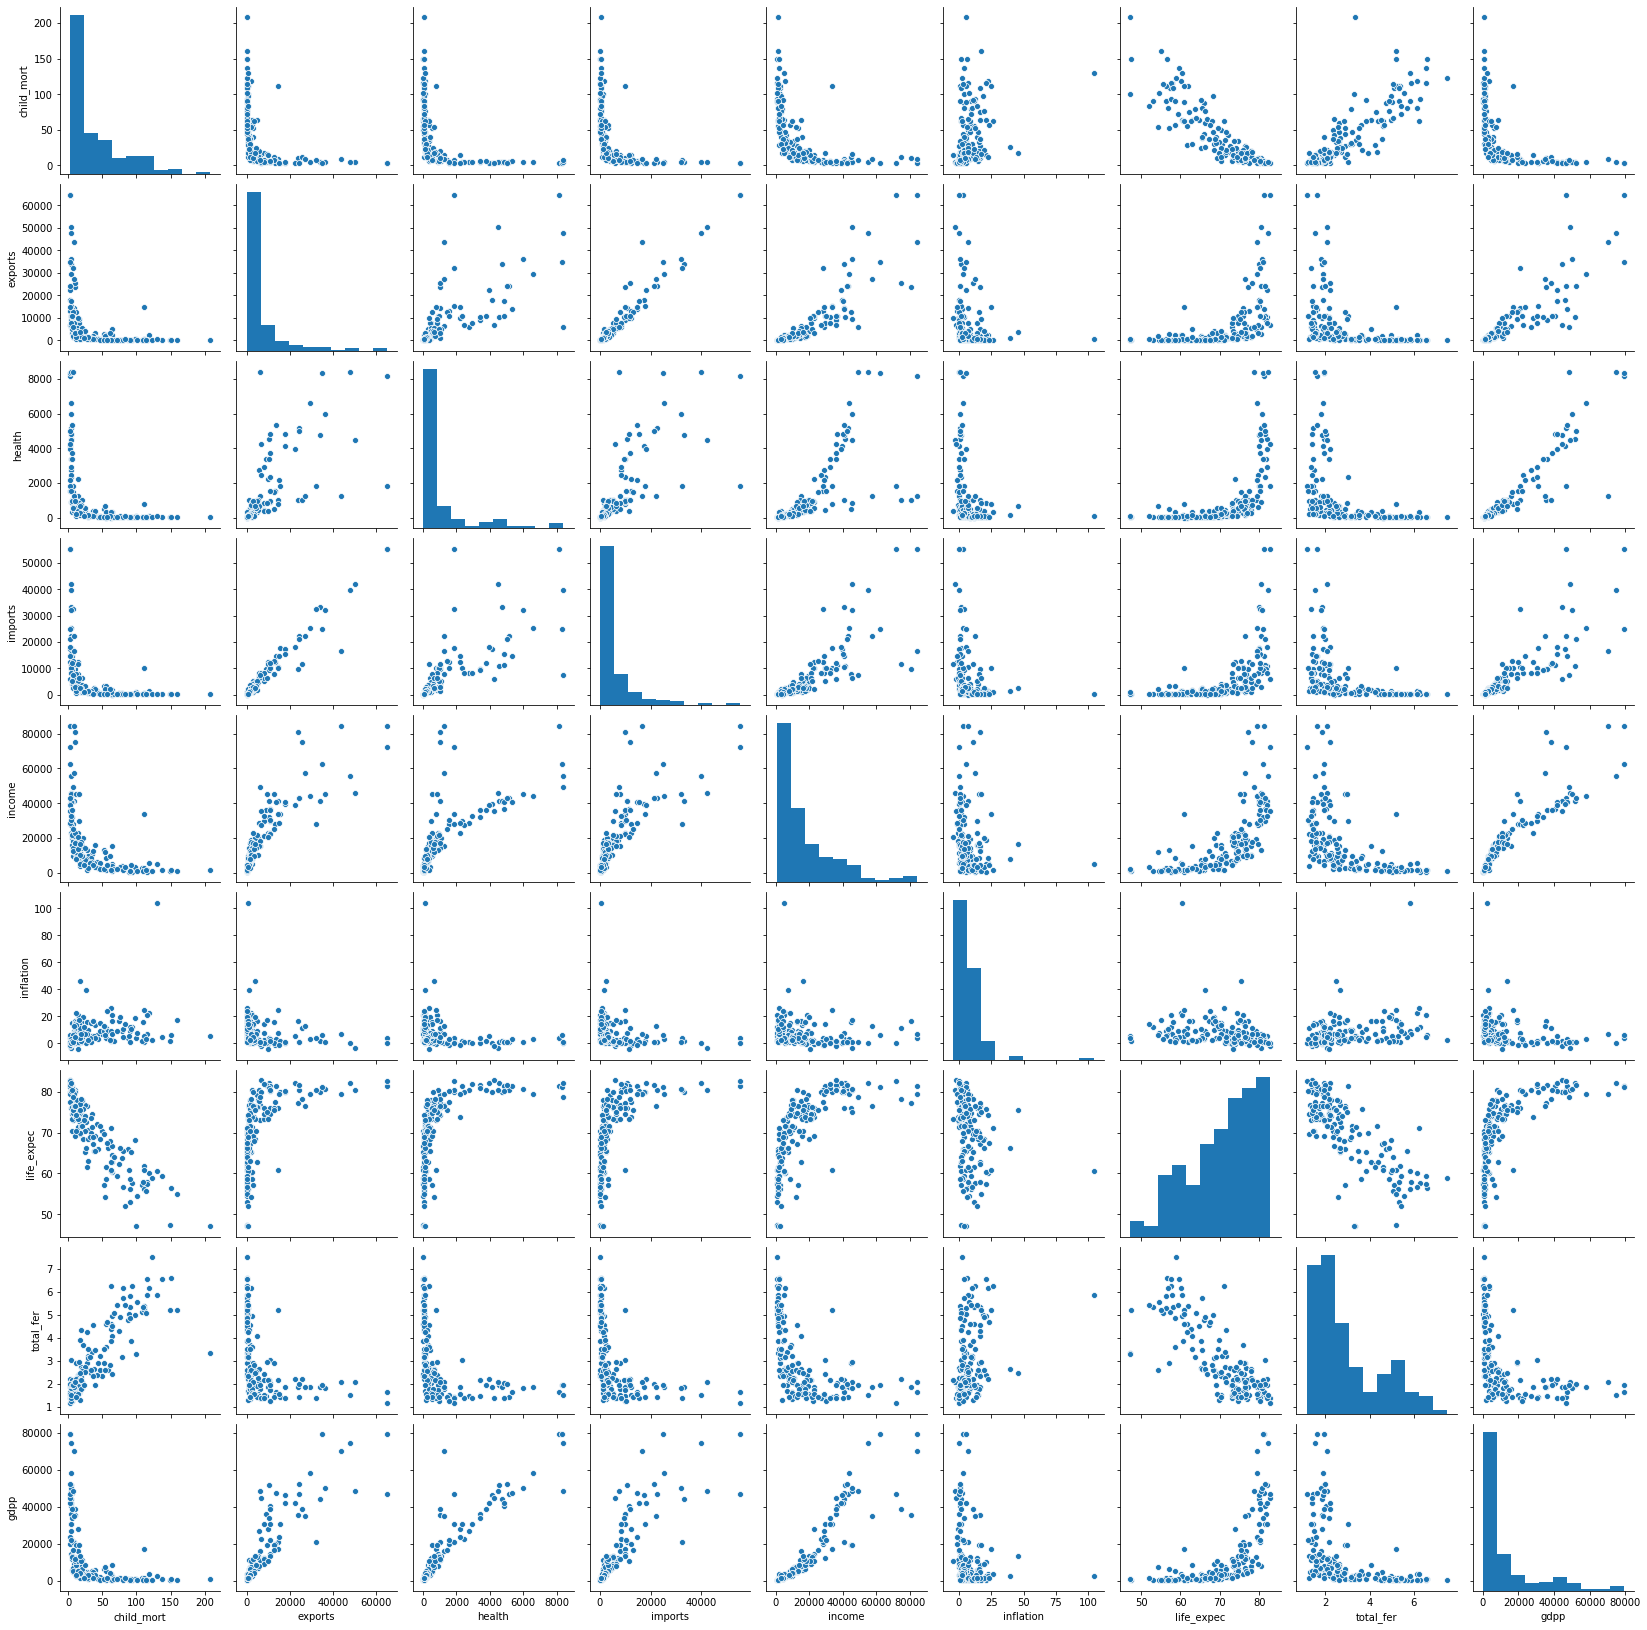

In [43]:
# Checking the correlations between variables
sns.pairplot(df)
plt.show()

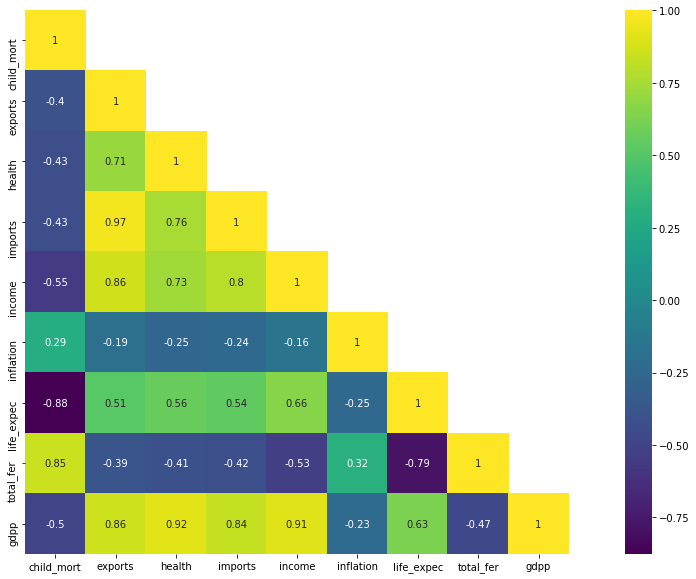

In [44]:
#Heat-map to show correlation between variables
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,cmap='viridis', square=True,annot=True)
plt.show()

**Insights:**
- Good positive correlation between child mortality and total fertility. As the total fertility increases child mortality also increases. We also observed this in our analysis above as most countries having highest total fertility also have high child mortality rates
- Child mortality rate has obvious negative correlation with life expectancy. As the child mortality goes up life expectancy goes down
- Life expectancy has negative correlation with total fertility
- Import has good correlation with exports as we observed above many countries have really good Trade to GDP ratio which means they Import and export more. 
- Import has high level of positive correlation with GDP of the country which is obvious
- Child Mortality rate has negative correlations with GDP and income. Poorer countries have higher child mortality rate.
- Life expectancy has good positive correlation with income and GDP. Which is believable as Richer people have resources at their disposal to take care of their health
- gdpp has good positive correlation with exports, imports, health and income. Which is quite obvious.

## 4. Data Preparation for modelling

### 4.1 Scaling of the Data

In [45]:
# List of Variables
cols=df.columns
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [46]:
# instantiating Scaler
scaler=StandardScaler()

# Fitting the data
df_scaled=scaler.fit_transform(df)

# Convert array to DataFrame
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=cols
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.693071,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.662026,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.685460,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.236112,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.720610,-0.541946,-0.032042


Now we have clean data to start Modelling. We will explore both KMeans and Hierarchical clustering 

## 5. Hopkins Statistics to check Cluster Tendency

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.9189827049249703

Hopkins Statistics over 80% is a good score that indicated that the data is good for cluster analysis

## 6. Modelling - K-Means Clustering

### 6.1 Deciding Number of Clusters

The important part of K-Means Clustering is deciding number of clusters. In a real life scenario we could consult domain experts to decide the number of clusters that make business sense.

However, other means of finding the optimal number of clusters are
- Elbow - Curve / SSD Method
- Silhouette Analysis

Even after finding optimal number of clusters using above methods we can consult domain experts to understand if it is good number.

Lets explore both these techniques

#### 6.1.1 Elbow - Curve / SSD Method

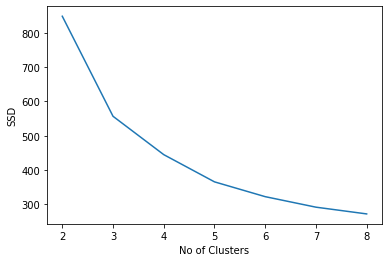

In [49]:
# Calculating SSDs for range of clusters
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
temp=pd.DataFrame(ssd,columns=['ssd'],index=range_n_clusters)

# plot the SSDs for each n_clusters
plt.plot(temp.ssd)
plt.xlabel('No of Clusters')
plt.ylabel('SSD')
plt.show()

#### 6.1.2 Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [50]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
ss = []
for n_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    ss.append([n_clusters, silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(n_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4785566374015181
For n_clusters=3, the silhouette score is 0.42404723583159126
For n_clusters=4, the silhouette score is 0.41014528553106444
For n_clusters=5, the silhouette score is 0.41610425967455106
For n_clusters=6, the silhouette score is 0.3182119774315459
For n_clusters=7, the silhouette score is 0.2986445541000397
For n_clusters=8, the silhouette score is 0.30825930397372386


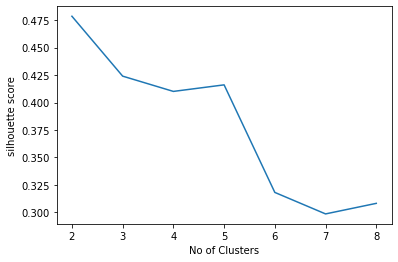

In [51]:
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.xlabel('No of Clusters')
plt.ylabel('silhouette score')
plt.show()

**Observation:** Based on both Silhouette Score and Elbow method, we can settle for 3 clusters (K=3).

### 6.2 Model with K-Means Clustering

In [52]:
# K-Means model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=0)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [53]:
# Lets store the Cluster IDs from K-Means in rfm dataframe
df['KMeansClusters']=kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [54]:
# Checking cluster count

df.KMeansClusters.value_counts()

2    92
0    48
1    27
Name: KMeansClusters, dtype: int64

We can observe that K=3 has produced though not very well balanced still a acceptable clusters. As this is unsupervised learning and we are not sure the size and shape of actual clusters we can settle with K=3 

### Cluster Visualizations

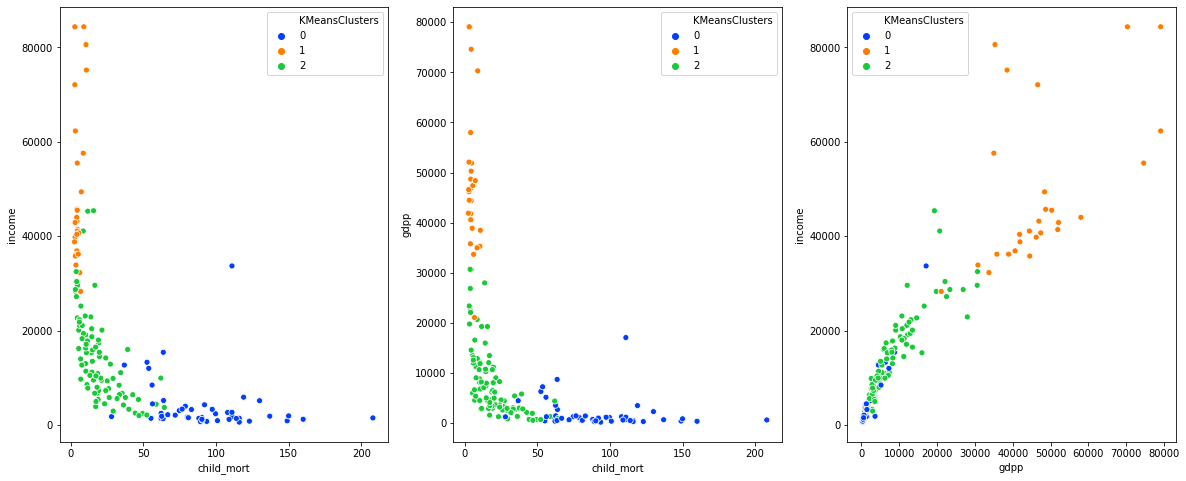

In [55]:
# Plotting Child Mortality Rate, GDPP and INCOME to depict the cluster formation
fig, axes = plt.subplots(1, 3,figsize=(20,8))
sns.scatterplot(ax=axes[0],x='child_mort',y='income',data=df,hue='KMeansClusters',palette='bright')
sns.scatterplot(ax=axes[1],x='child_mort',y='gdpp',data=df,hue='KMeansClusters',palette='bright')
sns.scatterplot(ax=axes[2],x='gdpp',y='income',data=df,hue='KMeansClusters',palette='bright')
plt.show()

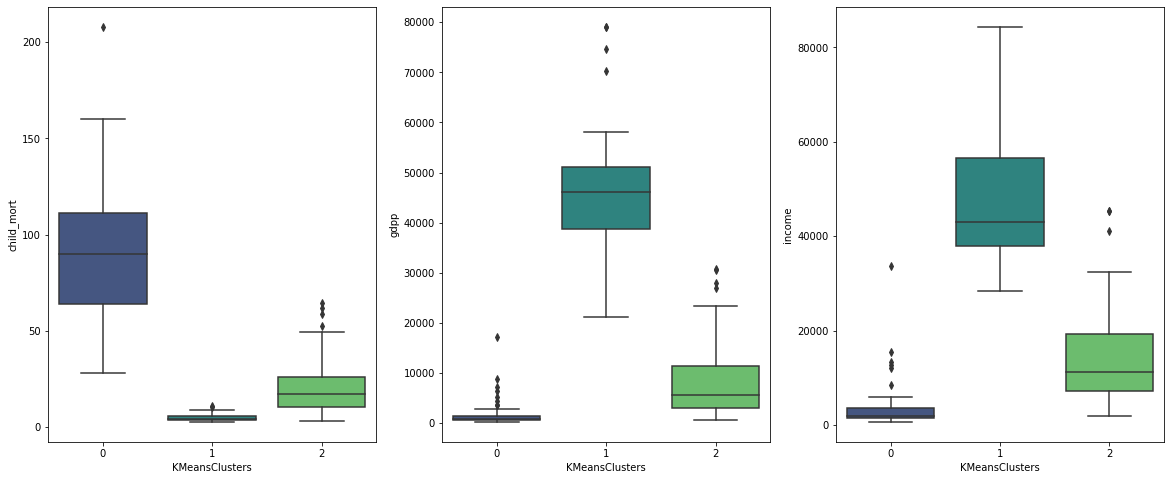

In [56]:
# Plotting Child Mortality Rate, GDPP and INCOME to depict the cluster formation
fig, axes = plt.subplots(1, 3,figsize=(20,8))
sns.boxplot(ax=axes[0],x='KMeansClusters',y='child_mort',data=df,palette='viridis')
sns.boxplot(ax=axes[1],x='KMeansClusters',y='gdpp',data=df,palette='viridis')
sns.boxplot(ax=axes[2],x='KMeansClusters',y='income',data=df,palette='viridis')
plt.show()

## **Observation:**
- **Cluster 0:** These are those poor countries which are contenders for financial help as they have high child mortality rates, very low GDPP and lowest Net Income per person. 
- **Cluster 1:** This group of countries have Low Child Mortality Rate, High GDPP and High Income. These are the rich countries which doesn't need funding from Help International
- **Cluster 2:** These countries have comparatively Low GDPP and Low Income but they also have lower child mortality rates

Help International CEO would be interested to look into the countries in Cluster 0

In [57]:
# List of Countries in Cluster 0
df[df['KMeansClusters']==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters
country,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.20,5.82,553.0,0
Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.10,6.16,3530.0,0
Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.80,5.36,758.0,0
Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.10,2.88,6350.0,0
Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.90,5.87,575.0,0
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.70,6.26,231.0,0
Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.30,5.11,1310.0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.50,5.21,446.0,0
Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.50,6.59,897.0,0


Now lets explore Hierarchical Clustering.

## 7. Modelling - Hierarchical Clustering

### 7.1 Hierarchical Clustering with Single Linkage

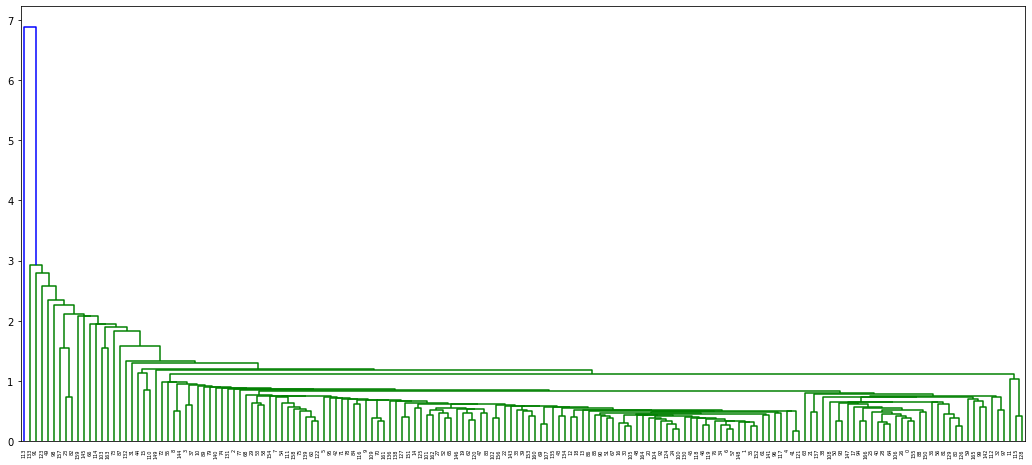

In [58]:
# Single linkage
mergings = linkage(df_scaled, method="single", metric='euclidean')
plt.figure(figsize=(18,8))
dendrogram(mergings)
plt.show()

We can see that Single Linkage doesn't give encouraging results. Lets explore Complete Linkage

### 7.2 Hierarchical Clustering with Complete Linkage

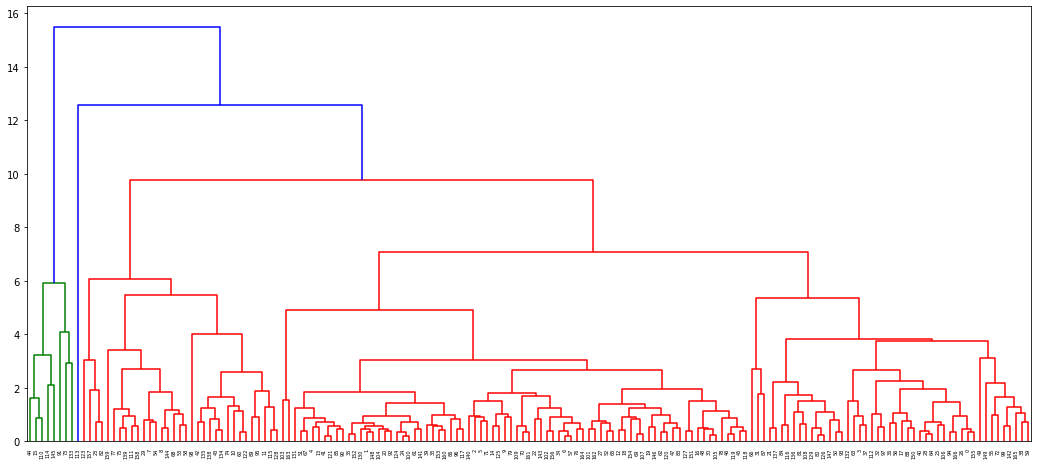

In [59]:
# Complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(18,8))
dendrogram(mergings)
plt.show()

#### 7.2.1 Hierarchical Clustering with 3 Clusters

In [60]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

# Lets store the Cluster IDs from Hierarchial Clustering in rfm dataframe
df['HierarchialClusters']=cluster_labels
df['HierarchialClusters'].value_counts()

0    158
1      8
2      1
Name: HierarchialClusters, dtype: int64

In [61]:
# Countries in Cluster 1
df[df['HierarchialClusters']==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters,HierarchialClusters
country,,,,,,,,,,,
Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1,1
Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1,1
Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,1,1
Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,1,1
Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,1,1
Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,1,1
Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,1,1
Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,1,1


In [62]:
# Countries in Cluster 2
df[df['HierarchialClusters']==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters,HierarchialClusters
country,,,,,,,,,,,
Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,0,2


#### 7.2.2 Hierarchical Clustering with 4 Clusters

In [63]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )

# Lets store the Cluster IDs from Hierarchial Clustering in rfm dataframe
df['HierarchialClusters']=cluster_labels
df['HierarchialClusters'].value_counts()

0    125
1     33
2      8
3      1
Name: HierarchialClusters, dtype: int64

In [64]:
# Countries in Cluster 2
df[df['HierarchialClusters']==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters,HierarchialClusters
country,,,,,,,,,,,
Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1,2
Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1,2
Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,1,2
Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,1,2
Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,1,2
Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,1,2
Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,1,2
Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,1,2


In [65]:
# Countries in Cluster 3
df[df['HierarchialClusters']==3]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeansClusters,HierarchialClusters
country,,,,,,,,,,,
Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,0,3


**Observation:** Seeing the above Dendrogram and analysis we can conclude the following
- ***Clusters=2:*** 2 number of clusters dosn't make any Business Sense in any kind of data. This Option is ruled out
- ***Cluster=3:*** This option will produce highly imbalanced Clusters. Countries like Singapore, Luxembourg, Ireland, Switzerland and Belgium which are high trading (High Export and High Import) are clustered together as one group. This additional information doesn't make any business sense to us as we are interested in the countries which are weak in Socio-Economic and Health parameters and are in direst need of Financial Aid. Even this options are ruled out. This also separates out Nigeria into a cluster. If we observe closely, Nigeria has weak Socio-Economic and Health parameters and will be a contender for Financial Aid. Therefore this option is also ruled out.
- ***Cluster=4:*** Similar to 3 Clusters this option also creates Cluster of Countries like Singapore, Luxembourg, Ireland, Switzerland and Belgium which is not of any use to us. Similarly Nigeria is separated into a cluster of its own.

Considering various possible options we can conclude that Hierarchical Clustering doesn't yield encouraging results for this dataset. We can therefore settle with K-Means Clustering with number of Clusters =3 as the best possible Option.

Lets now extract the Top-10 countries based on High Child Mortality Rate, Low Net Income per person and low GDPP which may need assistance from Help International

In [66]:
#Top-10 Countries which may need assistance from Help International as per K-Means Clustering
df.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head(10).index

Index(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone',
       'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi',
       'Eritrea'],
      dtype='object', name='country')

## 8. Conclusion: 

We have performed Clustering with both K-Means and Hierarchical Clustering and concluded that K-Means clustering with 3 clusters (K=3) produces encouraging results which make Business Sense.

**The Top-10 Countries which need Financial Aid from Help International are:**
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea

We have Observed during the detailed analysis that above countries featured in weaker groups based on various Socio-Economic parameters as detailed below
<br>**Burundi:** Featured among Bottom-5 countries in Exports, Imports, Net Income per person, Total Fertility Rate and GDPP.
<br>**Liberia:** Featured among Bottom-5 countries in Net Income per person and GDPP.
<br>**Congo, Dem. Rep.:** Featured among Bottom-5 countries in Net Income per person, Total Fertility Rate and GDPP.
<br>**Niger:** Featured among Bottom-5 countries in Health, Net Income per person, Total Fertility Rate and GDPP.
<br>**Sierra Leone:** Featured among Bottom-5 countries in Child Mortality Rate, Imports and GDPP.
<br>**Madagascar:** Featured among Bottom-5 countries in Health
<br>**Central African Republic:** Featured among Bottom-5 countries in Child Mortality Rate, Exports, Imports, Health, Net Income per person and Life Expectancy.
<br>**Malawi:** Featured among Bottom-5 countries in Life Expectancy.
<br>**Eritrea:** Featured among Bottom-5 countries in Exports, Imports and Health.